In [31]:
import numpy as np
from scipy.stats import norm, beta
import matplotlib.pyplot as plt

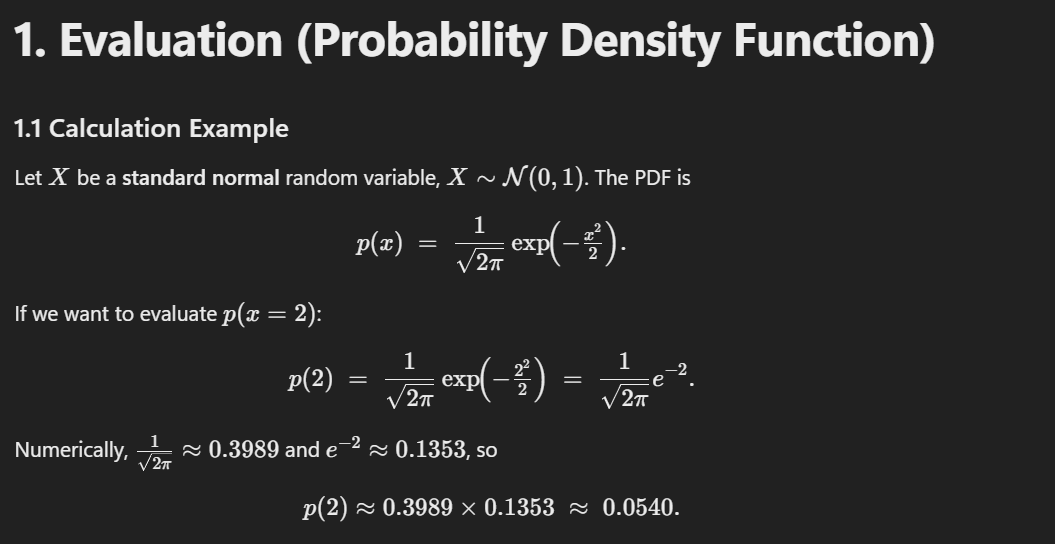

[1.48671951e-06 1.56294518e-06 1.64291438e-06 1.72680223e-06
 1.81479157e-06 1.90707332e-06 2.00384677e-06 2.10531999e-06
 2.21171010e-06 2.32324372e-06 2.44015731e-06 2.56269761e-06
 2.69112199e-06 2.82569895e-06 2.96670852e-06 3.11444274e-06
 3.26920615e-06 3.43131624e-06 3.60110404e-06 3.77891458e-06
 3.96510749e-06 4.16005756e-06 4.36415530e-06 4.57780761e-06
 4.80143840e-06 5.03548920e-06 5.28041992e-06 5.53670947e-06
 5.80485658e-06 6.08538047e-06 6.37882168e-06 6.68574289e-06
 7.00672970e-06 7.34239154e-06 7.69336257e-06 8.06030255e-06
 8.44389784e-06 8.84486240e-06 9.26393876e-06 9.70189908e-06
 1.01595463e-05 1.06377152e-05 1.11372736e-05 1.16591234e-05
 1.22042022e-05 1.27734842e-05 1.33679815e-05 1.39887459e-05
 1.46368699e-05 1.53134881e-05 1.60197791e-05 1.67569666e-05
 1.75263212e-05 1.83291622e-05 1.91668589e-05 2.00408326e-05
 2.09525584e-05 2.19035668e-05 2.28954459e-05 2.39298433e-05
 2.50084680e-05 2.61330924e-05 2.73055547e-05 2.85277610e-05
 2.98016873e-05 3.112938

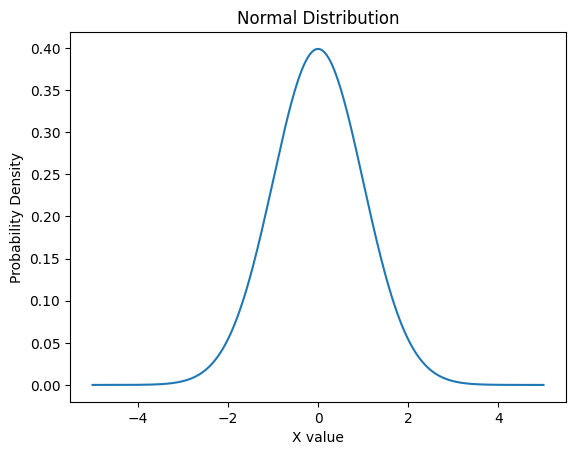

In [9]:
x_values = np.linspace(-5, 5, 1000)
mu = 0.0
sigma = 1.0
pdf_value = norm.pdf(x_values, loc=mu, scale=sigma)

# plot the pdf
plt.plot(x_values, pdf_value)
plt.title('Normal Distribution')
plt.xlabel('X value')
plt.ylabel('Probability Density')
plt.show()



# 2. Conditioning (Posterior Distribution)

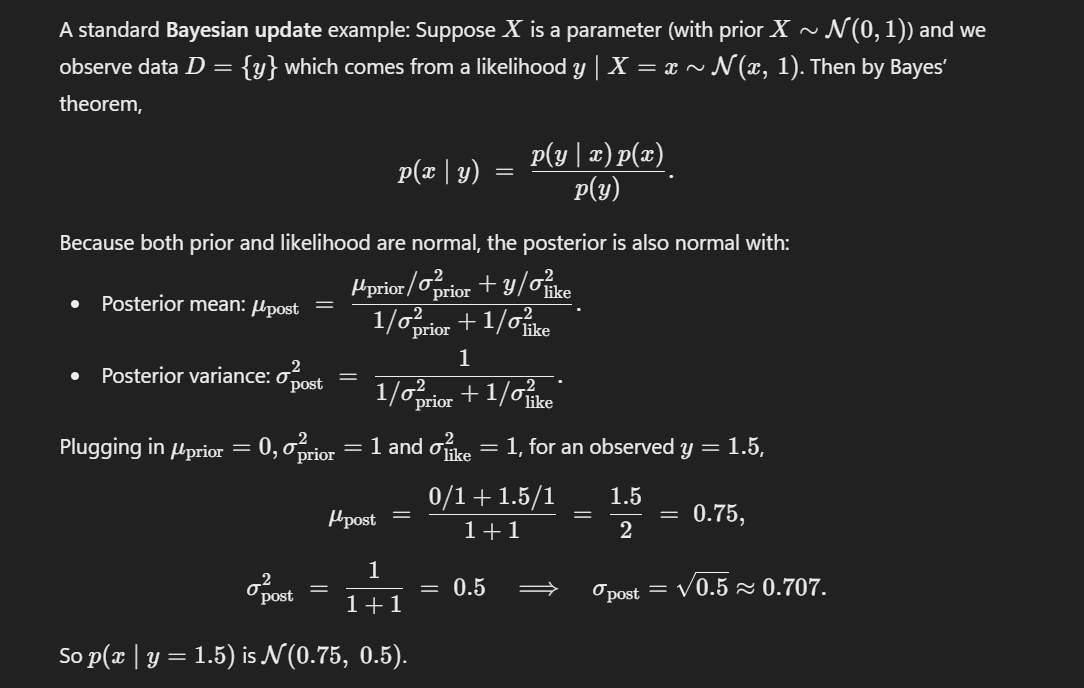

Posterior mean: 0.75
Posterior variance: 0.5


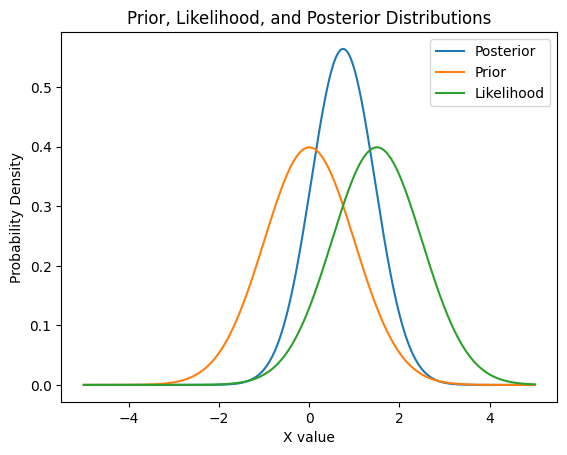

In [30]:
# Define prior distribution parameters
# We assume X follows N(0,1) as prior
mu_prior, var_prior = 0.0, 1.0 

# Define likelihood parameters
# Likelihood is N(x,1) where x is the true value
var_likelihood = 1.0

# Observed data point
y_observed = 1.5 

# Calculate posterior distribution parameters using Bayes' rule
# For Gaussian distributions, posterior is also Gaussian
# Posterior variance = (prior_var * likelihood_var)/(prior_var + likelihood_var)
post_var = var_prior * var_likelihood / (var_prior + var_likelihood)
# Posterior mean = (likelihood_var * prior_mean + prior_var * observation)/(prior_var + likelihood_var)
post_mu = var_likelihood * mu_prior + var_prior * y_observed / (var_prior + var_likelihood)

# Print the posterior parameters
print("Posterior mean:", post_mu)
print("Posterior variance:", post_var)

# Calculate probability density functions (PDFs) for plotting
# Posterior PDF: N(post_mu, sqrt(post_var))
post_pdf_value = norm.pdf(x_values, loc=post_mu, scale=np.sqrt(post_var))
# Prior PDF: N(mu_prior, sqrt(var_prior))
prior_pdf_value = norm.pdf(x_values, loc=mu_prior, scale=np.sqrt(var_prior))
# Likelihood PDF: N(y_observed, sqrt(var_likelihood))
likelihood_pdf_value = norm.pdf(x_values, loc=y_observed, scale=np.sqrt(var_likelihood))

# Create plot showing all three distributions
plt.plot(x_values, post_pdf_value)
plt.plot(x_values, prior_pdf_value)
plt.plot(x_values, likelihood_pdf_value)
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('X value')
plt.ylabel('Probability Density')
plt.legend(['Posterior', 'Prior', 'Likelihood'])
plt.show()


# Maximization (MAP or MLE)

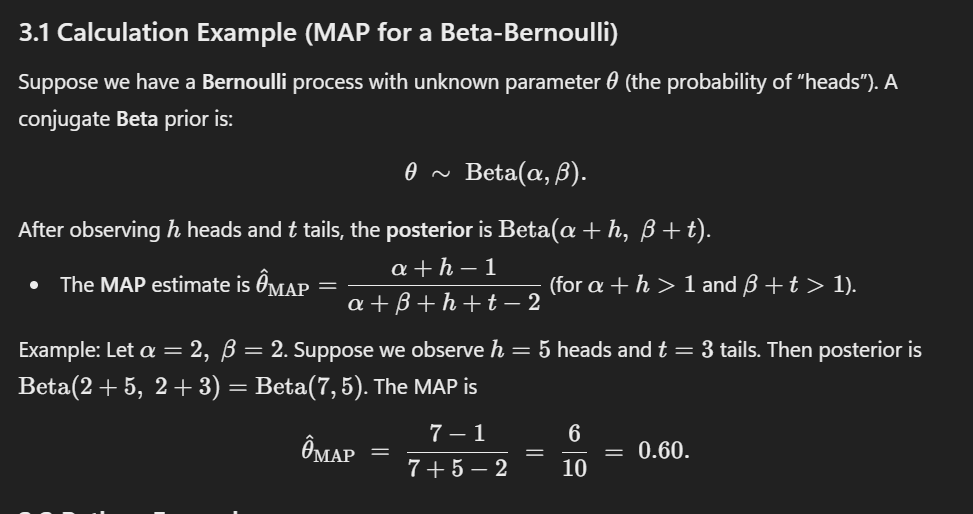

In [33]:
# Define parameters for Beta prior distribution
alpha, beta = 2, 2  # Prior parameters for Beta distribution

# Observed data: h (heads) and t (tails)
h, t = 5, 3  # 5 heads and 3 tails observed

# Calculate posterior parameters
# For Beta-Binomial conjugate pair:
# Posterior parameters = prior parameters + observed data
post_alpha = alpha + h  # Posterior alpha = prior alpha + number of heads
post_beta = beta + t    # Posterior beta = prior beta + number of tails

# Calculate MAP (Maximum A Posteriori) estimate
# MAP for Beta(a,b) = (a-1)/(a+b-2) when a,b > 1
map_estimate = (post_alpha - 1) / (post_alpha + post_beta - 2)

# Calculate MLE (Maximum Likelihood Estimate)
# MLE = number of successes / total number of trials
# For Beta distribution: MLE = a/(a+b)
mle_estimate = post_alpha / (post_alpha + post_beta)

# Print the results
print(f"MAP estimate: {map_estimate:.2f}")
print(f"MLE estimate: {mle_estimate:.2f}")


MAP estimate: 0.60
MLE estimate: 0.58


# Marginalization
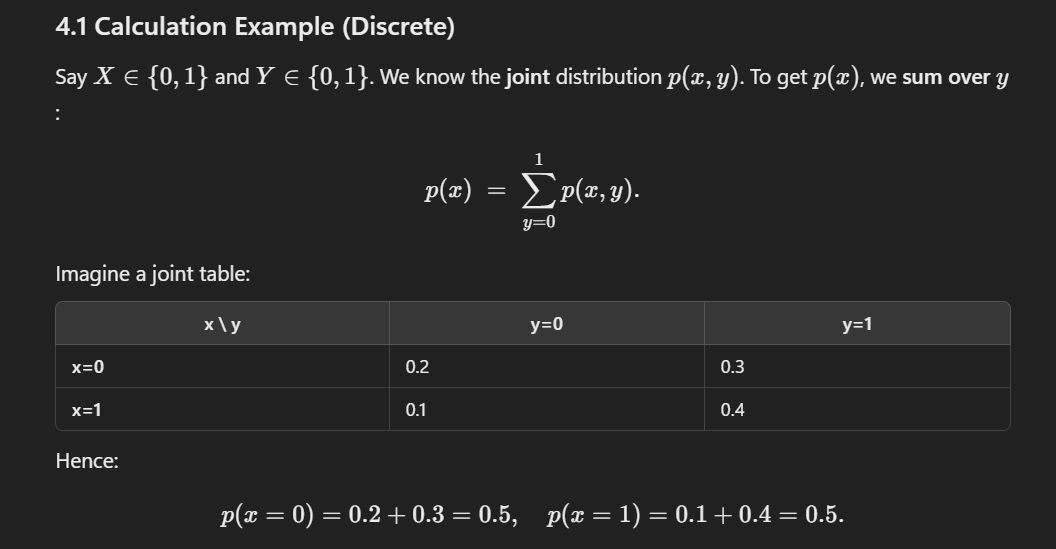


In [57]:
# Joint distribution over X=0,1 and Y=0,1
p_xy = np.array([
    [0.25, 0.25],  # X=0, Y=0/1
    [0.2, 0.3]    # X=1, Y=0/1
])
# Marginal distribution of X (sum along axis 1 - horizontal, row-wise)
p_x = np.sum(p_xy, axis=1) # Result: [0.5, 0.5]
print(f"Marginal distribution of X: {p_x}")
# Adds the number in each row and returns the sum of each row
# Row 0: 0.25 + 0.25 = 0.5
# Row 1: 0.2 + 0.3 = 0.5
print("*"* 40 )
# Marginal distribution of Y (sum along axis 0 - vertical, column-wise)
p_y = np.sum(p_xy, axis=0) # Result: [0.45, 0.55]
print(f"Marginal distribution of Y: {p_y}")
# Adds the number in each column and returns the sum of each column
# Column 0: 0.25 + 0.2 = 0.45
# Column 1: 0.25 + 0.3 = 0.55


Marginal distribution of X: [0.5 0.5]
****************************************
Marginal distribution of Y: [0.45 0.55]


# Sampling 

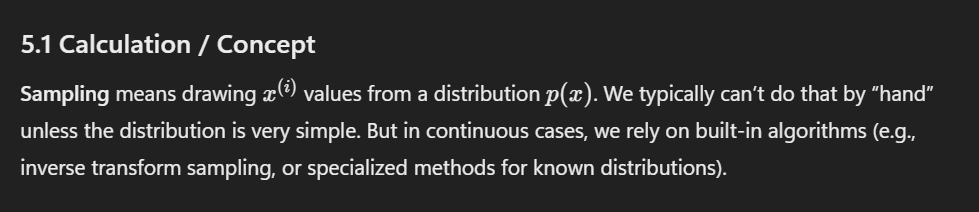

Random samples from N(0,1): [ 0.65203022  0.43048502  1.03082816 ... -1.30092837 -1.13728799
 -1.12194136]


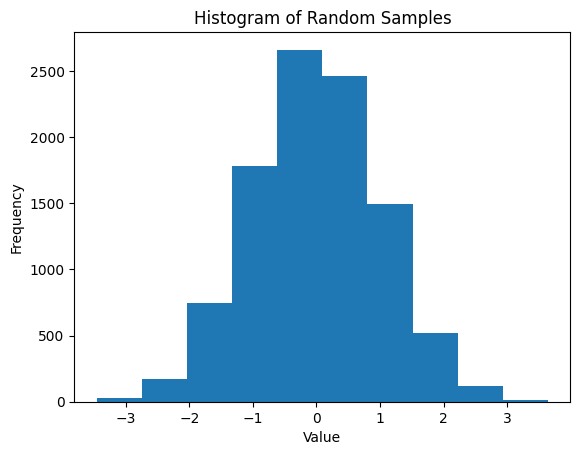

In [61]:
samples = np.random.normal(loc=0.0, scale=1.0, size=10000)
print("Random samples from N(0,1):", samples)

# visualize the samples
plt.hist(samples, bins=10)
plt.title('Histogram of Random Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Compute Expectations and Moments

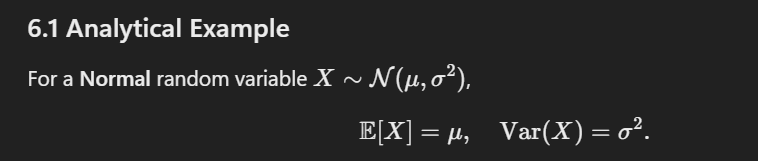

Empirical mean ~ 0.9596796815584415
Empirical variance ~ 99.34009363158671


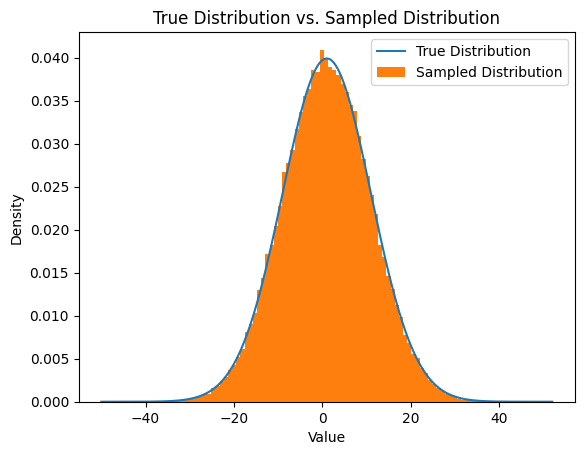

In [75]:
# True distribution
dist = norm(loc=1, scale=10)  # Creates a normal distribution with mean=1 and std=10

# Draw samples
N = 100000  # Number of samples to draw
samples = dist.rvs(size=N)  # Generate N random samples from the distribution

# Sample-based expectation (mean)
# The sample mean is an unbiased estimator of the population mean
# It converges to the true mean as N increases (Law of Large Numbers)
empirical_mean = np.mean(samples)

# Sample-based variance
# The sample variance estimates the spread of the distribution
# It measures how far the samples are from their mean value
empirical_var = np.var(samples)

# Print results
print("Empirical mean ~", empirical_mean)  # Should be close to true mean=1
print("Empirical variance ~", empirical_var)  # Should be close to true variance=100 (scale^2)

# The empirical mean and variance are random variables themselves
# They fluctuate around the true values due to random sampling
# As N increases, they become more accurate estimates
# This is an example of Monte Carlo estimation of distribution parameters

# plot the true distribution and the sampled 

# Plot the true distribution
x_values = np.linspace(-50, 52, 1000)
plt.plot(x_values, dist.pdf(x_values), label='True Distribution')

# Plot the histogram of samples
plt.hist(samples, bins=100, density=True, label='Sampled Distribution')

plt.title('True Distribution vs. Sampled Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


# Constructing Intervals (e.g. 95%)

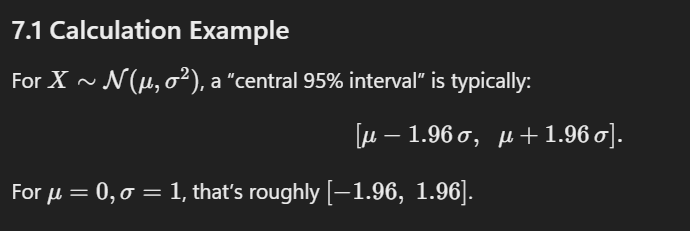

In [76]:
lower_95 = norm.ppf(0.025, loc=0, scale=1)
upper_95 = norm.ppf(0.975, loc=0, scale=1)

print("95% interval for N(0,1): [{:.3f}, {:.3f}]".format(lower_95, upper_95))
# ~ [-1.96, 1.96]

95% interval for N(0,1): [-1.960, 1.960]


In [77]:
samples = np.random.normal(0, 1, size=100000)
lower = np.percentile(samples, 2.5)
upper = np.percentile(samples, 97.5)
print("Empirical 95% interval: [{:.3f}, {:.3f}]".format(lower, upper))


Empirical 95% interval: [-1.959, 1.963]


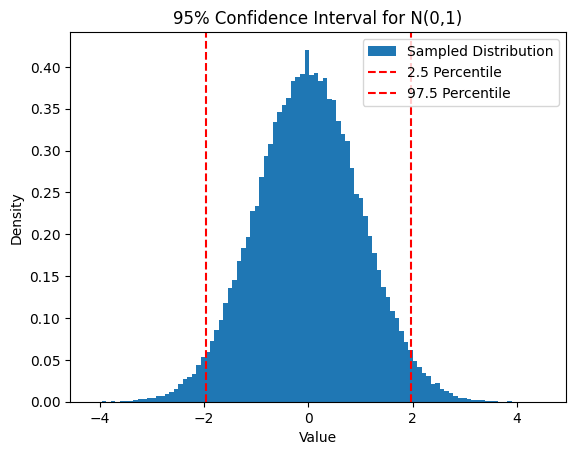

In [78]:
# plot the itnervals 
plt.hist(samples, bins=100, density=True, label='Sampled Distribution')
plt.axvline(lower, color='red', linestyle='--', label='2.5 Percentile')
plt.axvline(upper, color='red', linestyle='--', label='97.5 Percentile')
plt.title('95% Confidence Interval for N(0,1)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [83]:
import numpy as np
from scipy.stats import beta

def monte_carlo_demo(alpha, beta_, S=100000000, threshold=0.15):
    """
    Demonstrates Monte Carlo estimates of:
      1) E[theta] under a Beta(alpha, beta_)
      2) P(theta < threshold)
    """
    # Step 1: Generate S samples from the distribution:
    samples = np.random.beta(alpha, beta_, size=S)
    
    # Step 2: Estimate the posterior mean:
    mc_mean = np.mean(samples)
    
    # Step 3: Estimate probability that theta < threshold:
    mc_probability = np.mean(samples < threshold)
    
    # Step 4: Compare to exact known Beta values (for demonstration):
    from scipy.stats import beta as beta_dist
    exact_mean = alpha / (alpha + beta_)
    exact_prob = beta_dist.cdf(threshold, alpha, beta_)
    
    # Print results
    print(f"Sampling from Beta({alpha}, {beta_}) with S={S} samples.\n")
    print(f" Monte Carlo mean = {mc_mean:.4f}")
    print(f"   Exact Beta mean = {exact_mean:.4f}\n")
    
    print(f" MC Probability(θ < {threshold}) = {mc_probability:.4f}")
    print(f"   Exact Probability = {exact_prob:.4f}")

# Example usage:
if __name__ == "__main__":
    # For demonstration, let alpha=2, beta_=5
    # Then the Beta distribution is somewhat skewed.
    monte_carlo_demo(alpha=2, beta_=5, S=10000, threshold=0.15)


Sampling from Beta(2, 5) with S=10000 samples.

 Monte Carlo mean = 0.2871
   Exact Beta mean = 0.2857

 MC Probability(θ < 0.15) = 0.2206
   Exact Probability = 0.2235
